# RGB分量，全图片，聚类

In [2]:
from TFLite_detection_image import tflite_image_detection
import numpy as np
import cv2

box = []
image_path = 'img/test1.jpg'
class_path = 'pepper_class.txt'
model_path = 'pepper_detect_2cat_v3.tflite'
result = tflite_image_detection(class_path, model_path, image_path)
print(result)
for i in range(len(result)):
    if str(result[i][0]) == 'root':
        box = result[i]
        box.remove(box[0])
print(box)
# box = [259, 313, 295, 370]
src = cv2.imread(image_path)
src = src[box[1] - 10:box[3] + 10, box[0]:box[2] + 10]
cv2.imwrite('origin.jpg', src)
src = cv2.GaussianBlur(src, (3, 3), 0)  # 高斯滤波
src = cv2.cvtColor(src, cv2.COLOR_BGR2Lab)
img = src
Z = img.reshape((-1, 3))
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
# for i in range(len(res)):
#     if res[i].all() == center[0].all():
#         res[i] = [255,0,0]
#     if res[i].all() == center[1].all():
#         res[i] = [0,255,0]
#     if res[i].all() == center[2].all():
#         res[i] = [0,0,255]
res2 = res.reshape(img.shape)
dst = cv2.applyColorMap(res2, cv2.COLORMAP_RAINBOW)
print(center)
# blur = cv2.GaussianBlur(res2, (5, 5), 0)
# res3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2.imshow('res2', res2)
cv2.imshow('res2_', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

[0.77734375 0.77734375 0.39453125 0.37109375 0.19140625 0.16796875
 0.1484375  0.14453125 0.1328125  0.11328125]
[['pepper', 67, 21, 456, 365], ['root', 259, 313, 295, 370]]
[259, 313, 295, 370]
[[172 118 151]
 [134 122 150]
 [ 94 127 146]
 [ 47 131 140]]


In [59]:
src[src.shape[0]//2]

array([[ 77, 139, 113],
       [ 80, 139, 113],
       [ 80, 138, 115],
       [ 71, 137, 116],
       [ 69, 137, 116],
       [ 86, 136, 116],
       [100, 136, 116],
       [ 99, 137, 116],
       [ 89, 137, 116],
       [ 76, 137, 116],
       [ 65, 137, 115],
       [ 54, 138, 116],
       [ 39, 137, 117],
       [ 29, 134, 118],
       [ 37, 132, 117],
       [ 63, 132, 114],
       [ 84, 132, 111],
       [ 86, 129, 108],
       [ 85, 127, 105],
       [ 91, 126, 105],
       [ 99, 125, 104],
       [106, 125, 103],
       [115, 124, 101],
       [121, 125, 101],
       [127, 127, 101],
       [123, 129, 102],
       [100, 133, 104],
       [ 76, 138, 107],
       [ 76, 142, 106],
       [ 96, 145, 105],
       [121, 147, 105],
       [141, 147, 106],
       [150, 145, 105],
       [131, 144, 107],
       [ 95, 144, 108],
       [ 63, 144, 108],
       [ 48, 143, 110],
       [ 58, 142, 111],
       [ 77, 141, 111],
       [ 79, 139, 111],
       [ 65, 138, 111],
       [ 54, 137

# RGB分量，部分图片，聚类

In [109]:
from TFLite_detection_image import tflite_image_detection
import numpy as np
import cv2
from matplotlib import pyplot as plt
box = []
image_path = 'img/test1.jpg'
class_path = 'pepper_class.txt'
model_path = 'pepper_detect_2cat_v3.tflite'
result = tflite_image_detection(class_path, model_path, image_path)
print(result)
for i in range(len(result)):
    if str(result[i][0]) == 'root':
        box = result[i]
        box.remove(box[0])
print(box)
# box = [259, 313, 295, 370]
src = cv2.imread(image_path)
src = src[box[1]:box[3], box[0]:box[2] + 10]
src = src[src.shape[0]//3:2*src.shape[0]//3]
Z = src.reshape((-1, 3))
Z = np.float32(Z)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 5
ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
print(center)
# img_show = np.zeros(src.shape)
# img_show[:] = res
img_show = np.uint8(res).reshape(src.shape)
img_show = cv2.applyColorMap(img_show, cv2.COLORMAP_RAINBOW)
cv2.imshow('origin', src)
cv2.imshow('show', img_show)
# plt.imshow('show', img_show)
cv2.imshow('src', src)
# plt.imshow('src', src[src.shape[0]//3:2*src.shape[0]//3])
cv2.waitKey(0)
cv2.destroyAllWindows()

[0.77734375 0.77734375 0.39453125 0.37109375 0.19140625 0.16796875
 0.1484375  0.14453125 0.1328125  0.11328125]
[['pepper', 67, 21, 456, 365], ['root', 259, 313, 295, 370]]
[259, 313, 295, 370]
[[ 81 124 127]
 [ 16  31  40]
 [ 58 100  97]
 [127 162 179]
 [ 37  63  74]]


# K-Means聚类实例

In [81]:
import numpy as np
import cv2
src = cv2.imread('img/littleduck.jpg')
src = cv2.GaussianBlur(src, (3, 3), 0)  # 高斯滤波
src = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
img = src
Z = img.reshape((-1, 3))
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape(img.shape)
dst = cv2.applyColorMap(res2, cv2.COLORMAP_RAINBOW)
print(center)
# blur = cv2.GaussianBlur(res2, (5, 5), 0)
# res3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2.imshow('res2', res2)
cv2.imshow('res2_', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[148 146  85]
 [110 108 149]
 [ 80 113 142]]


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('img/test1.jpg')
imgplot = plt.imshow(img)

[0.77734375 0.77734375 0.39453125 0.37109375 0.19140625 0.16796875
 0.1484375  0.14453125 0.1328125  0.11328125]
[['pepper', 67, 21, 456, 365], ['root', 259, 313, 295, 370]]
[259, 313, 295, 370]
[[ 29 115 110]
 [ 19 106  50]
 [ 18 153  59]
 [ 21  86 151]]


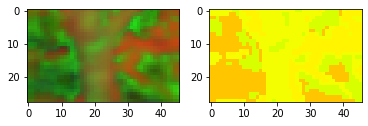

In [5]:
from TFLite_detection_image import tflite_image_detection
import numpy as np
import cv2
from matplotlib import pyplot as plt
box = []
image_path = 'img/test1.jpg'
class_path = 'pepper_class.txt'
model_path = 'pepper_detect_2cat_v3.tflite'
result = tflite_image_detection(class_path, model_path, image_path)
print(result)
for i in range(len(result)):
    if str(result[i][0]) == 'root':
        box = result[i]
        box.remove(box[0])
print(box)
# box = [259, 313, 295, 370]
src = cv2.imread(image_path)
src = src[box[1]:box[3], box[0]:box[2] + 10]
src = cv2.GaussianBlur(src, (3, 3), 0)  # 高斯滤波
src = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
src = src[src.shape[0]//4:3*src.shape[0]//4]
Z = src.reshape((-1, 3))
Z = np.float32(Z)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
print(center)
# img_show = np.zeros(src.shape)
# img_show[:] = res
img_show = np.uint8(res).reshape(src.shape)
img_show = cv2.applyColorMap(img_show, cv2.COLORMAP_RAINBOW)
img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
# cv2.imshow('origin', src)
# cv2.imshow('show', img_show)
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(src)
# ax = fig.add_subplot(1, 3, 2)
# src = src[src.shape[0]//4:3*src.shape[0]//4]
# imgplot = plt.imshow(src)
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(img_show)

[0.77734375 0.77734375 0.39453125 0.37109375 0.19140625 0.16796875
 0.1484375  0.14453125 0.1328125  0.11328125]
[['pepper', 67, 21, 456, 365], ['root', 259, 313, 295, 370]]
[259, 313, 295, 370]
[[147 121 151]
 [ 48 130 140]
 [104 125 149]]


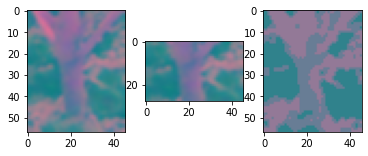

In [105]:
from TFLite_detection_image import tflite_image_detection
import numpy as np
import cv2
from matplotlib import pyplot as plt
box = []
image_path = 'img/test1.jpg'
class_path = 'pepper_class.txt'
model_path = 'pepper_detect_2cat_v3.tflite'
result = tflite_image_detection(class_path, model_path, image_path)
print(result)
for i in range(len(result)):
    if str(result[i][0]) == 'root':
        box = result[i]
        box.remove(box[0])
print(box)
# box = [259, 313, 295, 370]
src = cv2.imread(image_path)
src = src[box[1]:box[3], box[0]:box[2] + 10]
src = cv2.GaussianBlur(src, (3, 3), 0)  # 高斯滤波
src = cv2.cvtColor(src, cv2.COLOR_BGR2Lab)
Z = src.reshape((-1, 3))
Z = np.float32(Z)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
print(center)
# img_show = np.zeros(src.shape)
# img_show[:] = res
img_show = np.uint8(res).reshape(src.shape)
fig = plt.figure()
ax = fig.add_subplot(1, 3, 1)
imgplot = plt.imshow(src)
ax = fig.add_subplot(1, 3, 2)
src = src[src.shape[0]//4:3*src.shape[0]//4]
imgplot = plt.imshow(src)
ax = fig.add_subplot(1, 3, 3)
imgplot = plt.imshow(img_show)

In [9]:
from TFLite_detection_image import tflite_image_detection
import numpy as np
import cv2
from matplotlib import pyplot as plt
box = []
image_path = 'img/test1.jpg'
class_path = 'pepper_class.txt'
model_path = 'pepper_detect_2cat_v3.tflite'
result = tflite_image_detection(class_path, model_path, image_path)
print(result)
for i in range(len(result)):
    if str(result[i][0]) == 'root':
        box = result[i]
        box.remove(box[0])
# box = [259, 313, 295, 370]
src = cv2.imread(image_path)
src = src[box[1]:box[3], box[0]:box[2] + 10]
src = cv2.GaussianBlur(src, (3, 3), 1)
src = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
img = src
Z = src.reshape((-1, 3))
Z = np.float32(Z)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
imgHSV = img
# lower = np.array([14, 150, 40])
lower = np.array(center.min(0), dtype='int32')
upper = np.array([179, 255, 255])
# 获得指定颜色范围内的掩码
mask = cv2.inRange(imgHSV, lower, upper)
# 对原图图像进行按位与的操作，掩码区域保留
imgResult = cv2.bitwise_and(img, img, mask=mask)
cv2.imshow("origin", cv2.cvtColor(src, cv2.COLOR_HSV2BGR))
cv2.imshow("Mask", mask)
#显示分割后的图像
cv2.imshow("Result", imgResult)
cv2.waitKey(0)
cv2.destroyAllWindows()

[0.77734375 0.77734375 0.39453125 0.37109375 0.19140625 0.16796875
 0.1484375  0.14453125 0.1328125  0.11328125]
[['pepper', 67, 21, 456, 365], ['root', 259, 313, 295, 370]]


In [6]:
center.min(0)

array([20, 95, 66], dtype=uint8)